# 🚀 Duygu Analizi (Sentiment Analysis) Kapsamlı Rehber

Bu notebook'ta **Doğal Dil İşleme** alanının en popüler konularından biri olan **Duygu Analizi**'ni sıfırdan öğreneceğiz. Temel seviyeden başlayarak, gelişmiş yöntemlere kadar ilerleyeceğiz.

### 📚 Bu Rehberde Öğrenecekleriniz:
1. **Temel Kavramlar** - Duygu analizi nedir? Nasıl çalışır?
2. **Veri Ön İşleme** - Metinleri analiz için hazırlama teknikleri
3. **VADER Sentiment Analyzer** - Kural tabanlı yaklaşım
4. **Transformers (BERT) Modelleri** - Modern derin öğrenme yaklaşımları
5. **Model Karşılaştırması** - Hangisi ne zaman kullanılmalı?
6. **Pratik Uygulamalar** - Gerçek dünya örnekleri

### 🎯 Hedef Kitle:
- NLP'ye yeni başlayanlar
- Duygu analizi öğrenmek isteyenler
- Pratik uygulamalar arayan geliştiriciler

---

**Not:** Bu rehber hem teorik bilgi hem de pratik uygulamalar içerir. Kodları çalıştırarak öğrenmeyi unutmayın! 💪

## 🧠 Duygu Analizi Nedir?

**Duygu Analizi** (Sentiment Analysis), metinlerdeki duygusal tonu, tutumu veya görüşü otomatik olarak belirlemek için kullanılan bir **Doğal Dil İşleme (NLP)** tekniğidir.

### 🎯 Ana Hedefler:
- **Pozitif** 😊 - Olumlu duygular (memnuniyet, mutluluk, beğeni)
- **Negatif** 😞 - Olumsuz duygular (üzüntü, kızgınlık, memnuniyetsizlik)
- **Nötr** 😐 - Tarafsız veya objektif ifadeler

### 🌍 Kullanım Alanları:
- **E-ticaret:** Ürün yorumları analizi
- **Sosyal Medya:** Marka algısı takibi
- **Müşteri Hizmetleri:** Şikayet kategorilendirme
- **Pazarlama:** Kampanya etkisi ölçümü
- **Politik Analiz:** Kamuoyu araştırmaları

### 🛠️ Temel Yaklaşımlar:
1. **Kural Tabanlı** (VADER gibi) - Önceden tanımlanmış kurallar
2. **Makine Öğrenmesi** (Naive Bayes, SVM) - Özellik mühendisliği gerektirir
3. **Derin Öğrenme** (BERT, RoBERTa) - Son teknoloji sonuçlar

## 📦 1. Gerekli Kütüphanelerin Yüklenmesi

İlk adım olarak projemizde kullanacağımız tüm kütüphaneleri yükleyelim. Her bir kütüphanenin rolünü açıklayalım:

In [1]:
# 📊 Veri manipülasyonu ve analizi için
import pandas as pd
import numpy as np

# 🧠 Doğal Dil İşleme (NLP) için
import nltk

# 📈 Görselleştirme kütüphaneleri 
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Grafik ayarları ve renkler
import warnings
warnings.filterwarnings('ignore')

# 🔤 Duygu analizi için özel kütüphaneler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 🤖 Modern NLP için Transformers
from transformers import pipeline

# 📏 Model değerlendirme metrikleri
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# 📱 Pandas görüntüleme ayarları (uzun metinleri tam göstermek için)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

# 🎨 Matplotlib ayarları (Türkçe karakterler için)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Tüm kütüphaneler başarıyla yüklendi!")
print("🎉 Duygu analizi yolculuğumuza başlamaya hazırız!")

W1026 21:08:56.878000 24968 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


✅ Tüm kütüphaneler başarıyla yüklendi!
🎉 Duygu analizi yolculuğumuza başlamaya hazırız!


## 📚 2. NLTK Kaynaklarının İndirilmesi

NLTK kütüphanesi için gerekli veri kaynaklarını indiriyoruz. Bu kaynaklar duygu analizi ve metin ön işleme için gereklidir:

- **vader_lexicon**: VADER duygu analizi sözlüğü
- **stopwords**: Anlam taşımayan kelimelerin listesi  
- **wordnet**: Kelimelerin kök hallerini bulmak için
- **punkt_tab**: Cümle ve kelime ayırma için

In [2]:
# 📥 NLTK veri kaynaklarını indirelim
print("📥 NLTK kaynaklarını indiriliyor...")

# Duygu analizi için gerekli sözlük
nltk.download('vader_lexicon', quiet=True)
print("✅ VADER sentiment sözlüğü indirildi")

# Stopwords (anlamsız kelimeler) listesi
nltk.download('stopwords', quiet=True) 
print("✅ Stopwords listesi indirildi")

# Lemmatization (kök bulma) için gerekli
nltk.download('wordnet', quiet=True)
print("✅ WordNet sözlüğü indirildi")

# Tokenization (kelime ayırma) için gerekli
nltk.download('punkt_tab', quiet=True)
print("✅ Punkt tokenizer indirildi")

print("\n🎉 Tüm NLTK kaynakları başarıyla indirildi!")
print("🚀 Artık duygu analizi yapmaya hazırız!")

📥 NLTK kaynaklarını indiriliyor...
✅ VADER sentiment sözlüğü indirildi
✅ Stopwords listesi indirildi
✅ WordNet sözlüğü indirildi
✅ Punkt tokenizer indirildi

🎉 Tüm NLTK kaynakları başarıyla indirildi!
🚀 Artık duygu analizi yapmaya hazırız!
✅ VADER sentiment sözlüğü indirildi
✅ Stopwords listesi indirildi
✅ WordNet sözlüğü indirildi
✅ Punkt tokenizer indirildi

🎉 Tüm NLTK kaynakları başarıyla indirildi!
🚀 Artık duygu analizi yapmaya hazırız!


## 📁 3. Veri Setinin Yüklenmesi ve Keşfi

Amazon ürün yorumlarından oluşan gerçek bir veri seti kullanacağız. Bu veri seti:
- **reviewText**: Müşteri yorumu metni
- **Positive**: Hedef değişken (0: Negatif, 1: Pozitif)

Bu veri seti duygu analizi öğrenmek için idealdir çünkü gerçek dünya verisidir! 🌍

In [3]:
# 🌐 Amazon yorumları veri setini yükleme
print("📊 Amazon ürün yorumları veri seti yükleniyor...")

# Veri setinin URL'si
url = "https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv"

try:
    # Veri setini yükle
    df = pd.read_csv(url)
    
    print(f"✅ Veri seti başarıyla yüklendi!")
    print(f"📏 Veri boyutu: {df.shape[0]:,} yorum, {df.shape[1]} özellik")
    print("\n📋 Veri setinin ilk 5 satırına bakalım:")
    
    # İlk 5 satırı göster
    display(df.head())
    
except Exception as e:
    print(f"❌ Veri yükleme hatası: {e}")
    print("🔄 Yerel veri seti kullanmayı deneyelim...")

📊 Amazon ürün yorumları veri seti yükleniyor...
✅ Veri seti başarıyla yüklendi!
📏 Veri boyutu: 20,000 yorum, 2 özellik

📋 Veri setinin ilk 5 satırına bakalım:
✅ Veri seti başarıyla yüklendi!
📏 Veri boyutu: 20,000 yorum, 2 özellik

📋 Veri setinin ilk 5 satırına bakalım:


,reviewText,Positive
0,This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff,1
1,This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.,1
2,this is a really cool game. there are a bunch of levels and you can find golden eggs. super fun.,1
3,"This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.",1
4,This is a terrific game on any pad. Hrs of fun. My grandkids love it. Great entertainment when waiting in long lines,1


In [4]:
# 📊 Veri seti hakkında detaylı bilgi
print("=" * 50)
print("📊 VERİ SETİ ANALİZİ")
print("=" * 50)

print(f"📏 Toplam yorum sayısı: {len(df):,}")
print(f"📝 Ortalama yorum uzunluğu: {df['reviewText'].str.len().mean():.1f} karakter")
print(f"📈 En uzun yorum: {df['reviewText'].str.len().max():,} karakter")
print(f"📉 En kısa yorum: {df['reviewText'].str.len().min():,} karakter")

print("\n🎯 Hedef değişken dağılımı:")
print(f"😊 Pozitif yorumlar: {df['Positive'].sum():,} (%{df['Positive'].mean()*100:.1f})")
print(f"😞 Negatif yorumlar: {len(df) - df['Positive'].sum():,} (%{(1-df['Positive'].mean())*100:.1f})")

print("\n📋 Veri tipi bilgileri:")
print(df.dtypes)

print("\n❓ Eksik veri kontrolü:")
print(df.isnull().sum())

📊 VERİ SETİ ANALİZİ
📏 Toplam yorum sayısı: 20,000
📝 Ortalama yorum uzunluğu: 175.8 karakter
📈 En uzun yorum: 254 karakter
📉 En kısa yorum: 3 karakter

🎯 Hedef değişken dağılımı:
😊 Pozitif yorumlar: 15,233 (%76.2)
😞 Negatif yorumlar: 4,767 (%23.8)

📋 Veri tipi bilgileri:
reviewText    object
Positive       int64
dtype: object

❓ Eksik veri kontrolü:
reviewText    0
Positive      0
dtype: int64


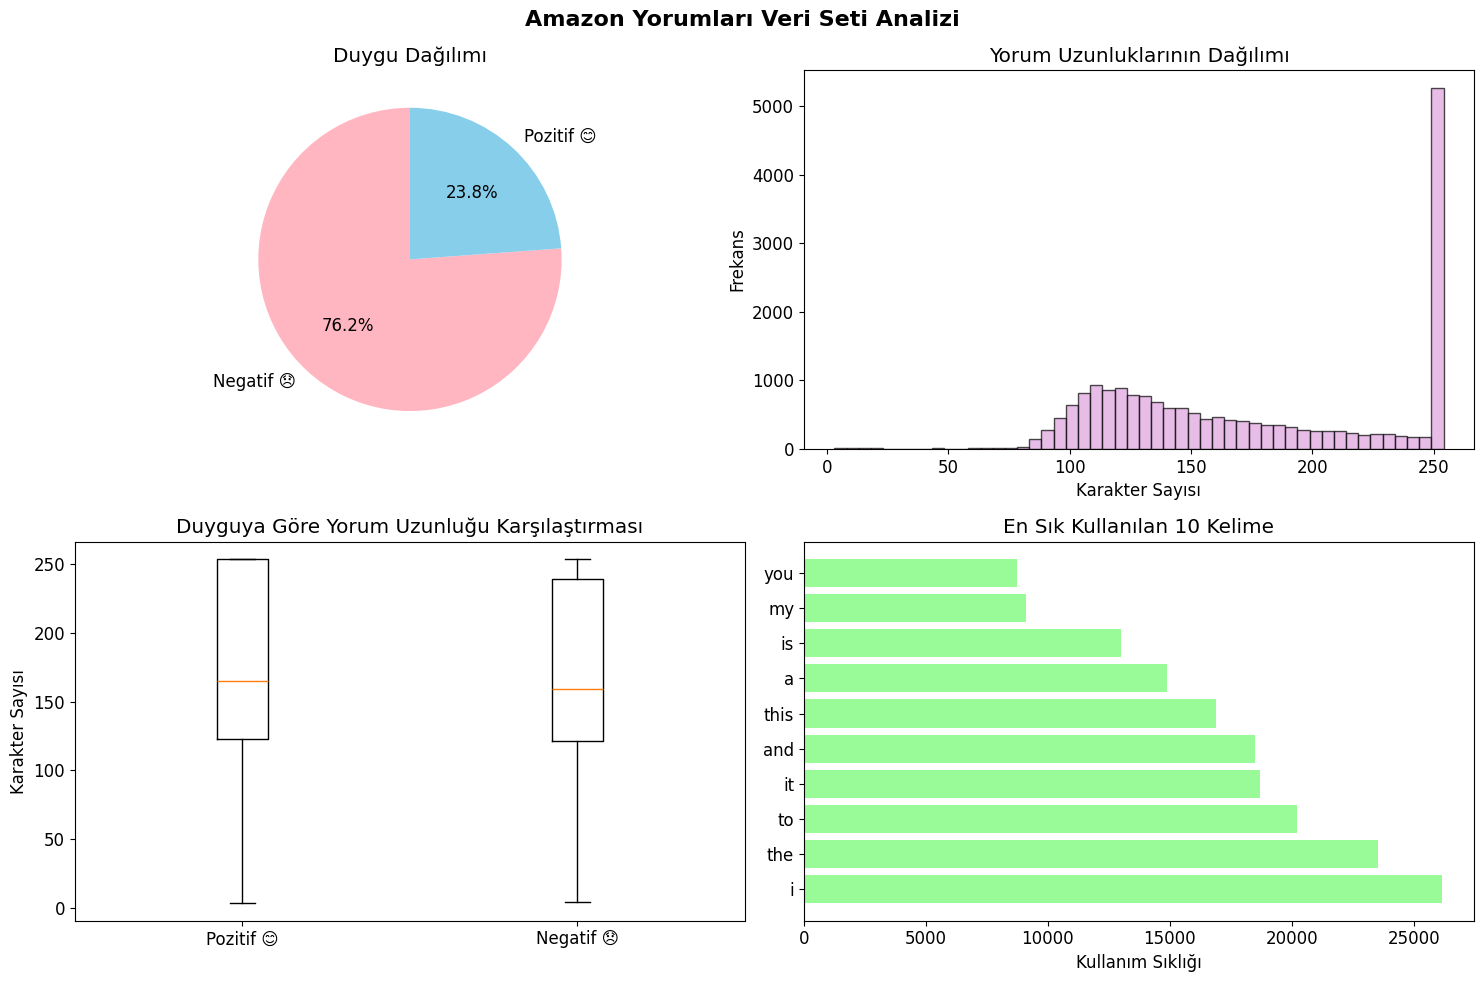

📈 Verilerimiz hakkında ilginç gözlemler:
• Pozitif yorumların ortalama uzunluğu: 176.9 karakter
• Negatif yorumların ortalama uzunluğu: 172.3 karakter
• Veri setimiz dengesiz bir dağılıma sahip


In [7]:
# 📊 Veri setinin görsel analizi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Amazon Yorumları Veri Seti Analizi', fontsize=16, fontweight='bold')

# Pastel renk paleti tanımlayalım
colors = ['#FFB6C1', '#87CEEB', '#DDA0DD', '#98FB98', '#F0E68C', '#FFA07A']

# 1. Duygu dağılımı
sentiment_counts = df['Positive'].value_counts()
sentiment_labels = ['Negatif 😞', 'Pozitif 😊']
axes[0,0].pie(sentiment_counts.values, labels=sentiment_labels, autopct='%1.1f%%', 
              colors=[colors[0], colors[1]], startangle=90)
axes[0,0].set_title('Duygu Dağılımı')

# 2. Yorum uzunluklarının histogramı
axes[0,1].hist(df['reviewText'].str.len(), bins=50, color=colors[2], alpha=0.7, edgecolor='black')
axes[0,1].set_title('Yorum Uzunluklarının Dağılımı')
axes[0,1].set_xlabel('Karakter Sayısı')
axes[0,1].set_ylabel('Frekans')

# 3. Pozitif vs Negatif yorumların uzunluk karşılaştırması
pos_lengths = df[df['Positive']==1]['reviewText'].str.len()
neg_lengths = df[df['Positive']==0]['reviewText'].str.len()

axes[1,0].boxplot([pos_lengths, neg_lengths], labels=['Pozitif 😊', 'Negatif 😞'])
axes[1,0].set_title('Duyguya Göre Yorum Uzunluğu Karşılaştırması')
axes[1,0].set_ylabel('Karakter Sayısı')

# 4. En sık kullanılan kelimelerin sayısı (basit analiz)
all_words = ' '.join(df['reviewText']).lower().split()
word_counts = pd.Series(all_words).value_counts().head(10)
axes[1,1].barh(range(len(word_counts)), word_counts.values, color=colors[3])
axes[1,1].set_yticks(range(len(word_counts)))
axes[1,1].set_yticklabels(word_counts.index)
axes[1,1].set_title('En Sık Kullanılan 10 Kelime')
axes[1,1].set_xlabel('Kullanım Sıklığı')

plt.tight_layout()
plt.show()

print("📈 Verilerimiz hakkında ilginç gözlemler:")
print(f"• Pozitif yorumların ortalama uzunluğu: {pos_lengths.mean():.1f} karakter")
print(f"• Negatif yorumların ortalama uzunluğu: {neg_lengths.mean():.1f} karakter")
print(f"• Veri setimiz {'dengeli' if abs(df['Positive'].mean() - 0.5) < 0.1 else 'dengesiz'} bir dağılıma sahip")

## 🧹 4. Metin Ön İşleme (Text Preprocessing)

Duygu analizi yapmadan önce metinlerimizi temizlememiz gerekiyor. Bu işlem şu adımlardan oluşur:

### 🔄 Preprocessing Adımları:
1. **Tokenization** 🔤: Metni kelimelere ayırma
2. **Lowercasing** 📝: Tüm harfleri küçük yapma
3. **Stopwords Removal** 🚫: Anlamsız kelimeleri kaldırma ("the", "and", "or" gibi)
4. **Lemmatization** 🌱: Kelimeleri kök hallerine çevirme ("running" → "run")

### 🤔 Neden Preprocessing Yapıyoruz?
- Modelin performansını artırır
- Gürültüyü azaltır
- Tutarlılık sağlar
- Bellek kullanımını optimize eder

**Not:** Modern BERT modelleri için preprocessing her zaman gerekli değildir, ancak VADER gibi geleneksel yöntemler için önemlidir! 🎯

In [8]:
# 🧹 Gelişmiş metin temizleme ve önişleme fonksiyonu

def clean_preprocess_text(text):
    """
    🎯 Amaç: Ham metni duygu analizi için optimize edilmiş hale getirmek
    
    📥 Girdi: Ham metin string'i
    📤 Çıktı: Temizlenmiş ve işlenmiş metin string'i
    """
    
    # Boş veya None kontrolü
    if pd.isna(text) or text == "":
        return ""
    
    # 1. 🔤 Tokenization: Metni kelimelere ayırma
    # lower() ile tüm harfleri küçük yapıyoruz
    tokens = word_tokenize(str(text).lower())
    
    # 2. 🚫 Stopwords kaldırma: Anlam taşımayan kelimeleri eleme
    # "the", "and", "or", "but" gibi kelimeler
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # 3. 🔤 Sadece alfabetik karakterleri tutma (noktalama işaretlerini kaldırma)
    alpha_tokens = [word for word in filtered_tokens if word.isalpha()]
    
    # 4. 🌱 Lemmatization: Kelimeleri kök hallerine çevirme
    # "running" → "run", "better" → "good" gibi
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in alpha_tokens]
    
    # 5. 🔗 İşlenmiş kelimeleri birleştirme
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

# 📊 Önişleme işlemini veri setimize uygulayalım
print("🔄 Metin önişleme başlatılıyor...")
print("⏳ Bu işlem biraz zaman alabilir...")

# Temizlenmiş metinleri yeni bir sütunda saklayalım
df["reviewText_clean"] = df["reviewText"].apply(clean_preprocess_text)

print("✅ Metin önişleme tamamlandı!")
print("🎉 Artık temizlenmiş metinlerimiz hazır!")

🔄 Metin önişleme başlatılıyor...
⏳ Bu işlem biraz zaman alabilir...
✅ Metin önişleme tamamlandı!
🎉 Artık temizlenmiş metinlerimiz hazır!
✅ Metin önişleme tamamlandı!
🎉 Artık temizlenmiş metinlerimiz hazır!


In [9]:
# 👁️ Önişleme öncesi ve sonrası karşılaştırma
print("🔍 Metin önişleme örnekleri:")
print("=" * 80)

# İlk 3 örneği gösterelim
for i in range(3):
    print(f"\n📝 Örnek {i+1}:")
    print(f"🔸 Orijinal: {df.iloc[i]['reviewText'][:150]}...")
    print(f"🔸 Temizlenmiş: {df.iloc[i]['reviewText_clean'][:150]}...")
    print("-" * 80)

# İstatistikler
original_avg_len = df['reviewText'].str.len().mean()
clean_avg_len = df['reviewText_clean'].str.len().mean()

print(f"\n📊 İstatistikler:")
print(f"📏 Orijinal ortalama uzunluk: {original_avg_len:.1f} karakter")
print(f"🧹 Temizlenmiş ortalama uzunluk: {clean_avg_len:.1f} karakter")
print(f"📉 Uzunluk azalması: %{((original_avg_len - clean_avg_len) / original_avg_len * 100):.1f}")

🔍 Metin önişleme örnekleri:

📝 Örnek 1:
🔸 Orijinal: This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff...
🔸 Temizlenmiş: one best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff...
--------------------------------------------------------------------------------

📝 Örnek 2:
🔸 Orijinal: This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too....
🔸 Temizlenmiş: pretty good version game free lot different level play kid enjoy lot...
--------------------------------------------------------------------------------

📝 Örnek 3:
🔸 Orijinal: this is a really cool game. there are a bunch of levels and you can find golden eggs. super fun....
🔸 Temizlenmiş: really cool game bunch level find golden egg super fun...
--------------------------------------------------------------------------------

📊 İstatistikler:
📏 Orijinal 

## 🎯 5. VADER Sentiment Analyzer ile Duygu Analizi

**VADER** (Valence Aware Dictionary and sEntiment Reasoner), özellikle sosyal medya metinleri için tasarlanmış kural tabanlı bir duygu analizi aracıdır.

### 🌟 VADER'ın Avantajları:
- **Hızlı** ⚡ - Eğitim gerektirmez, anında sonuç
- **Sosyal Medya Dostu** 📱 - Emoji, büyük harf, noktalama etkilerini anlıyor
- **Açıklanabilir** 🔍 - Neyi neden pozitif/negatif bulduğunu görebiliriz
- **Çok Dilli Destek** 🌍 - İngilizce için optimize edilmiş

### 📊 VADER Skorları:
- **neg**: Negatif duygu oranı (0.0 - 1.0)
- **neu**: Nötr duygu oranı (0.0 - 1.0)  
- **pos**: Pozitif duygu oranı (0.0 - 1.0)
- **compound**: Ana skor (-1.0 ile +1.0 arası)

In [10]:
# 🚀 VADER Sentiment Analyzer ile ilk denemelerimiz
print("🎯 VADER ile duygu analizi örnekleri:")
print("=" * 50)

# VADER analyzer'ı başlatalım
analyzer = SentimentIntensityAnalyzer()

# Farklı duygu örnekleri test edelim
test_sentences = [
    "I absolutely love this product! It's fantastic! 😍",
    "This is terrible. I hate it. 😡",
    "It's okay, nothing special.",
    "AMAZING!!! BEST PURCHASE EVER!!!",
    "meh... could be better :(",
    "Perfect quality, fast shipping, highly recommended! 5 stars ⭐⭐⭐⭐⭐"
]

# Her örnek için VADER skorlarını hesaplayalım
for i, sentence in enumerate(test_sentences, 1):
    scores = analyzer.polarity_scores(sentence)
    
    print(f"\n📝 Örnek {i}: {sentence}")
    print(f"📊 Skorlar: Neg={scores['neg']:.3f}, Neu={scores['neu']:.3f}, Pos={scores['pos']:.3f}")
    print(f"🎯 Compound: {scores['compound']:.3f}")
    
    # Compound skora göre duygu belirleme
    if scores['compound'] >= 0.05:
        sentiment = "😊 POZİTİF"
    elif scores['compound'] <= -0.05:
        sentiment = "😞 NEGATİF"
    else:
        sentiment = "😐 NÖTR"
    
    print(f"🏷️ Sonuç: {sentiment}")
    print("-" * 50)

🎯 VADER ile duygu analizi örnekleri:

📝 Örnek 1: I absolutely love this product! It's fantastic! 😍
📊 Skorlar: Neg=0.000, Neu=0.316, Pos=0.684
🎯 Compound: 0.865
🏷️ Sonuç: 😊 POZİTİF
--------------------------------------------------

📝 Örnek 2: This is terrible. I hate it. 😡
📊 Skorlar: Neg=0.694, Neu=0.306, Pos=0.000
🎯 Compound: -0.778
🏷️ Sonuç: 😞 NEGATİF
--------------------------------------------------

📝 Örnek 3: It's okay, nothing special.
📊 Skorlar: Neg=0.367, Neu=0.325, Pos=0.309
🎯 Compound: -0.092
🏷️ Sonuç: 😞 NEGATİF
--------------------------------------------------

📝 Örnek 4: AMAZING!!! BEST PURCHASE EVER!!!
📊 Skorlar: Neg=0.000, Neu=0.179, Pos=0.821
🎯 Compound: 0.880
🏷️ Sonuç: 😊 POZİTİF
--------------------------------------------------

📝 Örnek 5: meh... could be better :(
📊 Skorlar: Neg=0.330, Neu=0.341, Pos=0.330
🎯 Compound: 0.000
🏷️ Sonuç: 😐 NÖTR
--------------------------------------------------

📝 Örnek 6: Perfect quality, fast shipping, highly recommended! 5 stars ⭐⭐⭐⭐

### 🔍 VADER Eşik Değerleri ve Karar Verme

VADER'da **compound skor** ile duygu sınıflandırması yaparken şu eşik değerleri kullanırız:

- **compound ≥ 0.05**: 😊 **Pozitif**
- **compound ≤ -0.05**: 😞 **Negatif**  
- **-0.05 < compound < 0.05**: 😐 **Nötr**

Bu eşik değerler (±0.05) VADER geliştiricileri tarafından kapsamlı testlerle belirlenmiştir ve çoğu uygulama için optimal sonuçlar verir.

In [11]:
# 🎯 VADER'ı Amazon yorumları veri setimize uygulayalım

def get_vader_sentiment_score(text):
    """
    📊 VADER kullanarak metnin compound skorunu hesaplar
    
    📥 Girdi: Metin string'i
    📤 Çıktı: Compound skor (-1 ile +1 arası)
    """
    if pd.isna(text) or text == "":
        return 0.0
    
    score = analyzer.polarity_scores(str(text))
    return score['compound']

def get_vader_sentiment_label(text):
    """
    🏷️ VADER compound skoruna göre duygu etiketi döndürür
    
    📥 Girdi: Metin string'i  
    📤 Çıktı: 1 (Pozitif) veya 0 (Negatif)
    """
    compound = get_vader_sentiment_score(text)
    
    # Eşik değeri 0.05 kullanarak karar verme
    return 1 if compound >= 0.05 else 0

print("🔄 VADER analizi başlatılıyor...")
print("⏳ Tüm yorumlar analiz ediliyor...")

# Temizlenmiş metinlere VADER uygulayalım
df["vader_score"] = df["reviewText_clean"].apply(get_vader_sentiment_score)
df["vader_sentiment"] = df["reviewText_clean"].apply(get_vader_sentiment_label)

print("✅ VADER analizi tamamlandı!")

# Sonuçları inceleyelim
print("\\n📊 VADER Sonuçları:")
print(f"😊 VADER Pozitif: {df['vader_sentiment'].sum():,} (%{df['vader_sentiment'].mean()*100:.1f})")
print(f"😞 VADER Negatif: {len(df) - df['vader_sentiment'].sum():,} (%{(1-df['vader_sentiment'].mean())*100:.1f})")

# İlk birkaç sonucu gösterelim
display(df[['reviewText', 'reviewText_clean', 'Positive', 'vader_score', 'vader_sentiment']].head(10))

🔄 VADER analizi başlatılıyor...
⏳ Tüm yorumlar analiz ediliyor...
✅ VADER analizi tamamlandı!
\n📊 VADER Sonuçları:
😊 VADER Pozitif: 16,145 (%80.7)
😞 VADER Negatif: 3,855 (%19.3)
✅ VADER analizi tamamlandı!
\n📊 VADER Sonuçları:
😊 VADER Pozitif: 16,145 (%80.7)
😞 VADER Negatif: 3,855 (%19.3)


,reviewText,reviewText_clean,Positive,vader_score,vader_sentiment
0,This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff,one best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff,1,0.5423,1
1,This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.,pretty good version game free lot different level play kid enjoy lot,1,0.9325,1
2,this is a really cool game. there are a bunch of levels and you can find golden eggs. super fun.,really cool game bunch level find golden egg super fun,1,0.8687,1
3,"This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.",silly game frustrating lot fun definitely recommend fun time,1,0.8402,1
4,This is a terrific game on any pad. Hrs of fun. My grandkids love it. Great entertainment when waiting in long lines,terrific game pad hr fun grandkids love great entertainment waiting long line,1,0.9552,1
5,This is a very entertaining game! You don't have to be smart to play it. I guess that's why I like it...it's easy and fun and that's what games are suppose to be. Be warned: this game is highly addictive.,entertaining game smart play guess like easy fun game suppose warned game highly addictive,1,0.9274,1
6,this is awesome and you don't need wi ti to play trust me. it is really fun and addicting. there are like 100 levels it is even free don't waste your money on the expensive one I mean seriously. get the app,awesome need wi ti play trust really fun addicting like level even free waste money expensive one mean seriously get app,1,0.9428,1
7,this is awesome I bet no one even reads the reviews because they know this game is so good that they don't need to,awesome bet one even read review know game good need,1,0.7906,1
8,This is basicly the free version but with ads. That's actually awesome!!!! It's addicting and free at the same time really. I'd reccomend it.,basicly free version ad actually awesome addicting free time really reccomend,1,0.8934,1
9,this is by far the best free app that is available anywhere. it has helped pass the time when nothing else would do. don't pass this one up. PS I hate this 20 word minimum!,far best free app available anywhere helped pas time nothing else would pas one p hate word minimum,1,0.5859,1


## 📏 6. VADER Model Değerlendirmesi

Şimdi VADER modelimizin performansını değerlendirelim. Gerçek etiketlerle (Positive sütunu) VADER tahminlerini karşılaştıracağız.

In [13]:
# 📊 VADER Model Performans Değerlendirmesi

print("📊 VADER MODEL DEĞERLENDİRMESİ")
print("=" * 50)

# Temel metrikler
accuracy = accuracy_score(df["Positive"], df["vader_sentiment"])
precision = precision_score(df["Positive"], df["vader_sentiment"])
recall = recall_score(df["Positive"], df["vader_sentiment"])
f1 = f1_score(df["Positive"], df["vader_sentiment"])

print(f"🎯 Doğruluk (Accuracy): {accuracy:.3f} (%{accuracy*100:.1f})")
print(f"🔍 Kesinlik (Precision): {precision:.3f} (%{precision*100:.1f})")
print(f"📡 Duyarlılık (Recall): {recall:.3f} (%{recall*100:.1f})")
print(f"⚖️ F1-Score: {f1:.3f} (%{f1*100:.1f})")

# Confusion Matrix
cm_vader = confusion_matrix(df["Positive"], df["vader_sentiment"])
print(f"\\n🔢 Confusion Matrix:")
print(f"    Predicted")
print(f"      0    1")
print(f"  0  {cm_vader[0,0]:4d} {cm_vader[0,1]:4d}  Actual")
print(f"  1  {cm_vader[1,0]:4d} {cm_vader[1,1]:4d}")

# Detaylı sınıflandırma raporu
print(f"\\n📋 Detaylı Sınıflandırma Raporu:")
cr_vader = classification_report(df["Positive"], df["vader_sentiment"], 
                                target_names=['Negatif', 'Pozitif'])
print(cr_vader)

📊 VADER MODEL DEĞERLENDİRMESİ
🎯 Doğruluk (Accuracy): 0.807 (%80.7)
🔍 Kesinlik (Precision): 0.852 (%85.2)
📡 Duyarlılık (Recall): 0.903 (%90.3)
⚖️ F1-Score: 0.877 (%87.7)
\n🔢 Confusion Matrix:
    Predicted
      0    1
  0  2382 2385  Actual
  1  1473 13760
\n📋 Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

     Negatif       0.62      0.50      0.55      4767
     Pozitif       0.85      0.90      0.88     15233

    accuracy                           0.81     20000
   macro avg       0.74      0.70      0.71     20000
weighted avg       0.80      0.81      0.80     20000



<Figure size 1200x800 with 0 Axes>

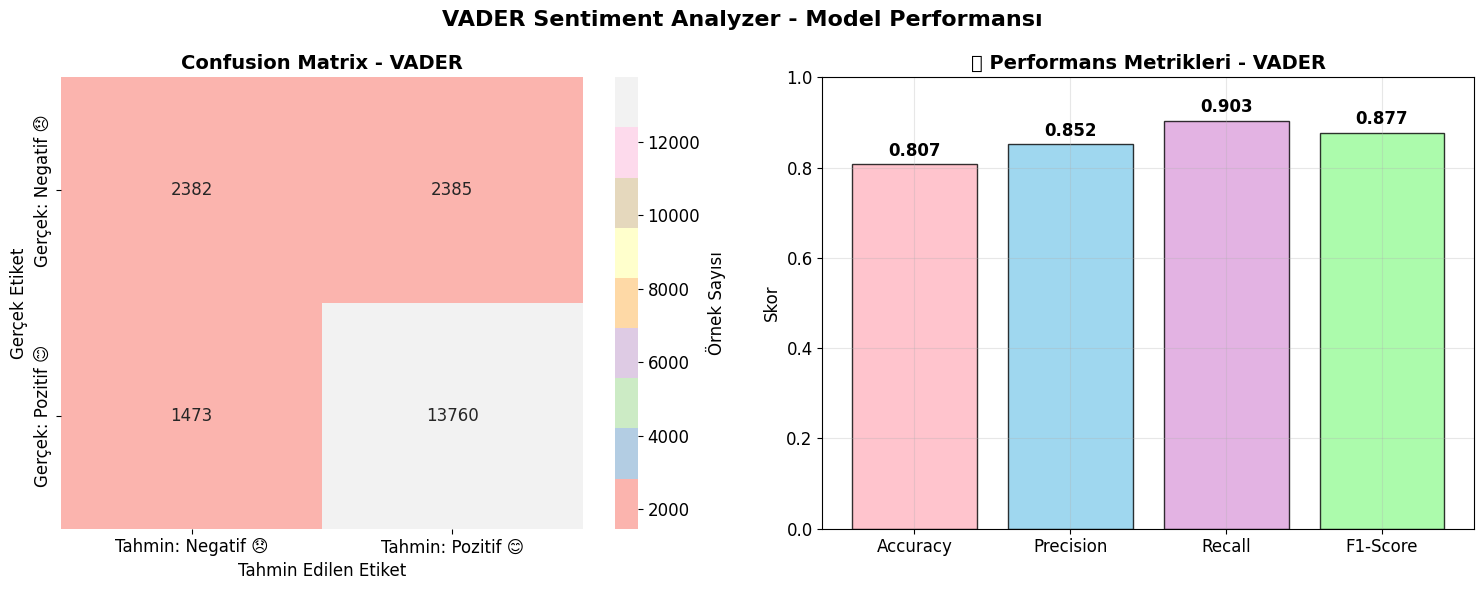

\n============================================================
📊 VADER PERFORMANS ÖZETİ
🏆 En İyi Metrik: Recall (0.903)
📉 En Düşük Metrik: Accuracy (0.807)
📊 Ortalama Performans: 0.860
\n🔍 Detaylı Confusion Matrix Analizi:
✅ Doğru Negatif (TN): 2,382
❌ Yanlış Pozitif (FP): 2,385
❌ Yanlış Negatif (FN): 1,473
✅ Doğru Pozitif (TP): 13,760


In [15]:
# 🎨 Profesyonel Confusion Matrix Görselleştirmesi (Pastel Renkler)

# Pastel renk paleti oluşturalım
pastel_colors = ['#FFE4E1', '#E6F3FF', '#F0E6FF', '#E6FFE6']  # Çok açık pastel tonlar

# Büyük ve profesyonel görselleştirme
plt.figure(figsize=(12, 8))

# Alt grafikler oluşturalım
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('VADER Sentiment Analyzer - Model Performansı', fontsize=16, fontweight='bold')

# 1. Confusion Matrix Heatmap
sns.heatmap(cm_vader, 
            annot=True, 
            fmt='d', 
            cmap='Pastel1',  # Pastel renk paleti
            cbar_kws={'label': 'Örnek Sayısı'},
            xticklabels=['Tahmin: Negatif 😞', 'Tahmin: Pozitif 😊'],
            yticklabels=['Gerçek: Negatif 😞', 'Gerçek: Pozitif 😊'],
            ax=axes[0])

axes[0].set_title('Confusion Matrix - VADER', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tahmin Edilen Etiket', fontsize=12)
axes[0].set_ylabel('Gerçek Etiket', fontsize=12)

# 2. Performans Metrikleri Bar Grafiği
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors_bar = ['#FFB6C1', '#87CEEB', '#DDA0DD', '#98FB98']

bars = axes[1].bar(metrics, values, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1)
axes[1].set_title('📈 Performans Metrikleri - VADER', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Skor', fontsize=12)
axes[1].set_ylim(0, 1)

# Bar üzerine değerleri yazalım
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Grid ekleyelim
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Özet rapor
print("\\n" + "="*60)
print("📊 VADER PERFORMANS ÖZETİ")
print("="*60)
print(f"🏆 En İyi Metrik: {metrics[np.argmax(values)]} ({max(values):.3f})")
print(f"📉 En Düşük Metrik: {metrics[np.argmin(values)]} ({min(values):.3f})")
print(f"📊 Ortalama Performans: {np.mean(values):.3f}")

# Confusion Matrix analizi
tn, fp, fn, tp = cm_vader.ravel()
print(f"\\n🔍 Detaylı Confusion Matrix Analizi:")
print(f"✅ Doğru Negatif (TN): {tn:,}")
print(f"❌ Yanlış Pozitif (FP): {fp:,}")
print(f"❌ Yanlış Negatif (FN): {fn:,}")
print(f"✅ Doğru Pozitif (TP): {tp:,}")

## 🤖 7. Transformers ile Modern Duygu Analizi

Şimdi **Hugging Face Transformers** kütüphanesini kullanarak modern BERT tabanlı duygu analizi yapalım. Bu yaklaşım:

### 🌟 Transformers'ın Avantajları:
- **Son Teknoloji** 🚀 - BERT, RoBERTa gibi en gelişmiş modeller
- **Otomatik Preprocessing** 🔧 - Tokenization, padding otomatik
- **Bağlam Anlayışı** 🧠 - Kelimelerin anlamını cümle içinde anlıyor
- **Transfer Learning** 📚 - Milyonlarca metinle önceden eğitilmiş

### ⚡ Kullanım Kolaylığı:
Modern NLP'de preprocessing'e (stopwords, lemmatization vb.) genellikle gerek yoktur çünkü BERT modelleri ham metinle çalışmak üzere eğitilmiştir!

In [16]:
# 🤖 Transformers sentiment pipeline'ını başlatalım

print("🚀 Transformers model yükleniyor...")
print("⏳ İlk kullanımda model indirilecek, biraz bekleyin...")

try:
    # Sentiment analysis pipeline'ını oluştur
    # Bu varsayılan olarak DistilBERT tabanlı bir model kullanır
    sentiment_pipeline = pipeline("sentiment-analysis")
    
    print("✅ Transformers modeli başarıyla yüklendi!")
    print("🎉 Modern NLP gücü hazır!")
    
    # Örnek testler yapalım
    print("\\n🧪 Transformers modeli test ediliyor:")
    print("-" * 50)
    
    test_examples = [
        "I love this product! It's amazing! 😍",
        "This is terrible. Worst purchase ever. 😡", 
        "It's okay, nothing special.",
        "BEST PRODUCT EVER!!! Highly recommend! 🔥🔥🔥"
    ]
    
    for i, text in enumerate(test_examples, 1):
        result = sentiment_pipeline(text)[0]
        
        print(f"📝 Test {i}: {text}")
        print(f"🏷️ Sonuç: {result['label']} (Güven: {result['score']:.3f})")
        print("-" * 50)
        
except Exception as e:
    print(f"❌ Model yükleme hatası: {e}")
    print("💡 İnternet bağlantınızı kontrol edin veya daha sonra tekrar deneyin.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


🚀 Transformers model yükleniyor...
⏳ İlk kullanımda model indirilecek, biraz bekleyin...
✅ Transformers modeli başarıyla yüklendi!
🎉 Modern NLP gücü hazır!
\n🧪 Transformers modeli test ediliyor:
--------------------------------------------------
📝 Test 1: I love this product! It's amazing! 😍
🏷️ Sonuç: POSITIVE (Güven: 1.000)
--------------------------------------------------
📝 Test 2: This is terrible. Worst purchase ever. 😡
🏷️ Sonuç: NEGATIVE (Güven: 1.000)
--------------------------------------------------
📝 Test 3: It's okay, nothing special.
🏷️ Sonuç: NEGATIVE (Güven: 0.819)
--------------------------------------------------
📝 Test 4: BEST PRODUCT EVER!!! Highly recommend! 🔥🔥🔥
🏷️ Sonuç: POSITIVE (Güven: 1.000)
--------------------------------------------------
✅ Transformers modeli başarıyla yüklendi!
🎉 Modern NLP gücü hazır!
\n🧪 Transformers modeli test ediliyor:
--------------------------------------------------
📝 Test 1: I love this product! It's amazing! 😍
🏷️ Sonuç: POSITIVE (G

In [17]:
# 📊 Transformers modelini veri setimize uygulayalım
# Performans için ilk 1000 yorumu kullanalım

print("🔄 Veri seti hazırlanıyor...")

# Büyük veri seti olduğu için ilk 1000 yorumu kullanacağız
# Gerçek projelerinizde GPU kullanarak tüm veriyi işleyebilirsiniz
df_sample = df.head(1000).copy()

print(f"📊 Analiz edilecek yorum sayısı: {len(df_sample):,}")
print("⏳ Transformers analizi başlatılıyor...")
print("💡 Bu işlem VADER'dan daha uzun sürecek, sabırlı olun...")

# Progress tracking için batch'ler halinde işleyelim
batch_size = 100
total_batches = len(df_sample) // batch_size + (1 if len(df_sample) % batch_size != 0 else 0)

bert_results = []

for i in range(0, len(df_sample), batch_size):
    batch_end = min(i + batch_size, len(df_sample))
    batch_texts = df_sample['reviewText'].iloc[i:batch_end].tolist()
    
    # Batch progress
    current_batch = i // batch_size + 1
    print(f"📦 Batch {current_batch}/{total_batches} işleniyor... ({i+1}-{batch_end})")
    
    try:
        # Transformers pipeline uygula
        batch_results = sentiment_pipeline(batch_texts)
        bert_results.extend(batch_results)
        
    except Exception as e:
        print(f"⚠️ Batch {current_batch} hatası: {e}")
        # Hata durumunda boş sonuç ekle
        bert_results.extend([{'label': 'NEGATIVE', 'score': 0.5}] * len(batch_texts))

print("✅ Transformers analizi tamamlandı!")

# Sonuçları DataFrame'e ekleyelim
df_sample['bert_result'] = bert_results
df_sample['bert_label'] = df_sample['bert_result'].apply(lambda x: x['label'])
df_sample['bert_score'] = df_sample['bert_result'].apply(lambda x: x['score'])

# POSITIVE olanları 1, NEGATIVE olanları 0 yap
df_sample['bert_sentiment'] = df_sample['bert_label'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

print("\\n📈 Transformers Sonuçları:")
print(f"😊 BERT Pozitif: {df_sample['bert_sentiment'].sum():,} (%{df_sample['bert_sentiment'].mean()*100:.1f})")
print(f"😞 BERT Negatif: {len(df_sample) - df_sample['bert_sentiment'].sum():,} (%{(1-df_sample['bert_sentiment'].mean())*100:.1f})")

🔄 Veri seti hazırlanıyor...
📊 Analiz edilecek yorum sayısı: 1,000
⏳ Transformers analizi başlatılıyor...
💡 Bu işlem VADER'dan daha uzun sürecek, sabırlı olun...
📦 Batch 1/10 işleniyor... (1-100)
📦 Batch 2/10 işleniyor... (101-200)
📦 Batch 2/10 işleniyor... (101-200)
📦 Batch 3/10 işleniyor... (201-300)
📦 Batch 3/10 işleniyor... (201-300)
📦 Batch 4/10 işleniyor... (301-400)
📦 Batch 4/10 işleniyor... (301-400)
📦 Batch 5/10 işleniyor... (401-500)
📦 Batch 5/10 işleniyor... (401-500)
📦 Batch 6/10 işleniyor... (501-600)
📦 Batch 6/10 işleniyor... (501-600)
📦 Batch 7/10 işleniyor... (601-700)
📦 Batch 7/10 işleniyor... (601-700)
📦 Batch 8/10 işleniyor... (701-800)
📦 Batch 8/10 işleniyor... (701-800)
📦 Batch 9/10 işleniyor... (801-900)
📦 Batch 9/10 işleniyor... (801-900)
📦 Batch 10/10 işleniyor... (901-1000)
📦 Batch 10/10 işleniyor... (901-1000)
✅ Transformers analizi tamamlandı!
\n📈 Transformers Sonuçları:
😊 BERT Pozitif: 768 (%76.8)
😞 BERT Negatif: 232 (%23.2)
✅ Transformers analizi tamamlandı!

## 📏 8. Transformers Model Değerlendirmesi

In [18]:
# 📊 Transformers (BERT) Model Performansı

print("📊 TRANSFORMERS (BERT) MODEL DEĞERLENDİRMESİ")
print("=" * 55)

# Sample veri seti için gerçek etiketleri alalım
y_true_sample = df_sample['Positive']
y_pred_bert = df_sample['bert_sentiment']

# Performans metrikleri
accuracy_bert = accuracy_score(y_true_sample, y_pred_bert)
precision_bert = precision_score(y_true_sample, y_pred_bert)
recall_bert = recall_score(y_true_sample, y_pred_bert)
f1_bert = f1_score(y_true_sample, y_pred_bert)

print(f"🎯 Doğruluk (Accuracy): {accuracy_bert:.3f} (%{accuracy_bert*100:.1f})")
print(f"🔍 Kesinlik (Precision): {precision_bert:.3f} (%{precision_bert*100:.1f})")
print(f"📡 Duyarlılık (Recall): {recall_bert:.3f} (%{recall_bert*100:.1f})")
print(f"⚖️ F1-Score: {f1_bert:.3f} (%{f1_bert*100:.1f})")

# Confusion Matrix
cm_bert = confusion_matrix(y_true_sample, y_pred_bert)
print(f"\\n🔢 Confusion Matrix:")
print(f"    Predicted")
print(f"      0    1")
print(f"  0  {cm_bert[0,0]:4d} {cm_bert[0,1]:4d}  Actual")
print(f"  1  {cm_bert[1,0]:4d} {cm_bert[1,1]:4d}")

# Detaylı sınıflandırma raporu
print(f"\\n📋 Detaylı Sınıflandırma Raporu:")
cr_bert = classification_report(y_true_sample, y_pred_bert, 
                               target_names=['Negatif', 'Pozitif'])
print(cr_bert)

📊 TRANSFORMERS (BERT) MODEL DEĞERLENDİRMESİ
🎯 Doğruluk (Accuracy): 0.850 (%85.0)
🔍 Kesinlik (Precision): 0.980 (%98.0)
📡 Duyarlılık (Recall): 0.848 (%84.8)
⚖️ F1-Score: 0.909 (%90.9)
\n🔢 Confusion Matrix:
    Predicted
      0    1
  0    97   15  Actual
  1   135  753
\n📋 Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

     Negatif       0.42      0.87      0.56       112
     Pozitif       0.98      0.85      0.91       888

    accuracy                           0.85      1000
   macro avg       0.70      0.86      0.74      1000
weighted avg       0.92      0.85      0.87      1000



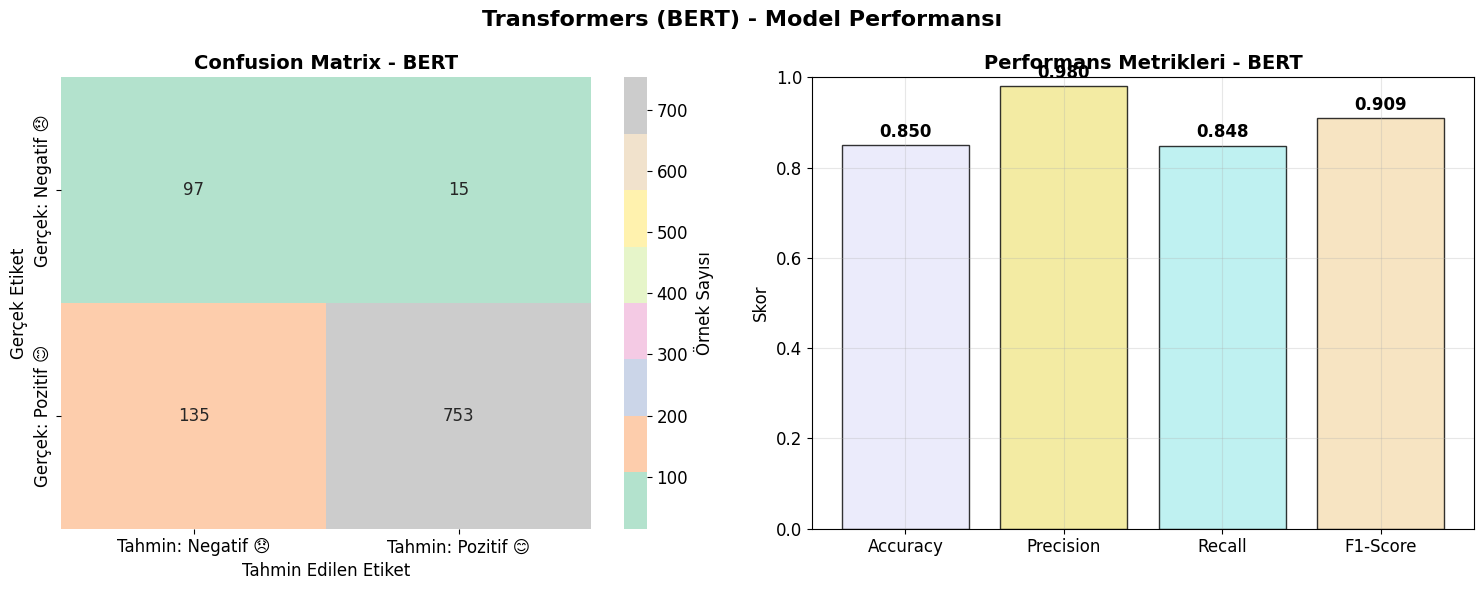

\n============================================================
🤖 TRANSFORMERS (BERT) PERFORMANS ÖZETİ
🏆 En İyi Metrik: Precision (0.980)
📉 En Düşük Metrik: Recall (0.848)
📊 Ortalama Performans: 0.897
\n🔍 Detaylı Confusion Matrix Analizi:
✅ Doğru Negatif (TN): 97
❌ Yanlış Pozitif (FP): 15
❌ Yanlış Negatif (FN): 135
✅ Doğru Pozitif (TP): 753


In [20]:
# 🎨 Transformers için Profesyonel Confusion Matrix Görselleştirmesi

# Büyük ve profesyonel görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Transformers (BERT) - Model Performansı', fontsize=16, fontweight='bold')

# 1. Confusion Matrix Heatmap - Pastel renkler
sns.heatmap(cm_bert, 
            annot=True, 
            fmt='d', 
            cmap='Pastel2',  # Farklı pastel renk paleti
            cbar_kws={'label': 'Örnek Sayısı'},
            xticklabels=['Tahmin: Negatif 😞', 'Tahmin: Pozitif 😊'],
            yticklabels=['Gerçek: Negatif 😞', 'Gerçek: Pozitif 😊'],
            ax=axes[0])

axes[0].set_title('Confusion Matrix - BERT', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tahmin Edilen Etiket', fontsize=12)
axes[0].set_ylabel('Gerçek Etiket', fontsize=12)

# 2. Performans Metrikleri Bar Grafiği - Pastel renkler
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values_bert = [accuracy_bert, precision_bert, recall_bert, f1_bert]
colors_pastel = ['#E6E6FA', '#F0E68C', '#AFEEEE', '#F5DEB3']  # Lavender, Khaki, PaleTurquoise, Wheat

bars = axes[1].bar(metrics, values_bert, color=colors_pastel, alpha=0.8, edgecolor='black', linewidth=1)
axes[1].set_title('Performans Metrikleri - BERT', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Skor', fontsize=12)
axes[1].set_ylim(0, 1)

# Bar üzerine değerleri yazalım
for bar, value in zip(bars, values_bert):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Grid ekleyelim
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Özet rapor
print("\\n" + "="*60)
print("🤖 TRANSFORMERS (BERT) PERFORMANS ÖZETİ")
print("="*60)
print(f"🏆 En İyi Metrik: {metrics[np.argmax(values_bert)]} ({max(values_bert):.3f})")
print(f"📉 En Düşük Metrik: {metrics[np.argmin(values_bert)]} ({min(values_bert):.3f})")
print(f"📊 Ortalama Performans: {np.mean(values_bert):.3f}")

# Confusion Matrix analizi
tn_bert, fp_bert, fn_bert, tp_bert = cm_bert.ravel()
print(f"\\n🔍 Detaylı Confusion Matrix Analizi:")
print(f"✅ Doğru Negatif (TN): {tn_bert:,}")
print(f"❌ Yanlış Pozitif (FP): {fp_bert:,}")
print(f"❌ Yanlış Negatif (FN): {fn_bert:,}")
print(f"✅ Doğru Pozitif (TP): {tp_bert:,}")

## ⚖️ 9. Model Karşılaştırması: VADER vs Transformers

Şimdi iki yaklaşımımızı karşılaştıralım ve hangisinin ne zaman kullanılması gerektiğini anlayalım.

MODEL KARŞILAŞTIRMASI: VADER vs TRANSFORMERS
📊 Performans Karşılaştırma Tablosu:
      Metrik  VADER  Transformers   Fark         Kazanan
0   Accuracy  0.839         0.850  0.011  🤖 Transformers
1  Precision  0.930         0.980  0.050  🤖 Transformers
2     Recall  0.885         0.848 -0.037         🎯 VADER
3   F1-Score  0.907         0.909  0.002  🤖 Transformers
\n🏆 GENEL KAZANAN:
🤖 Transformers (Ortalama: 0.897 vs 0.890)
📈 Performans farkı: 0.007


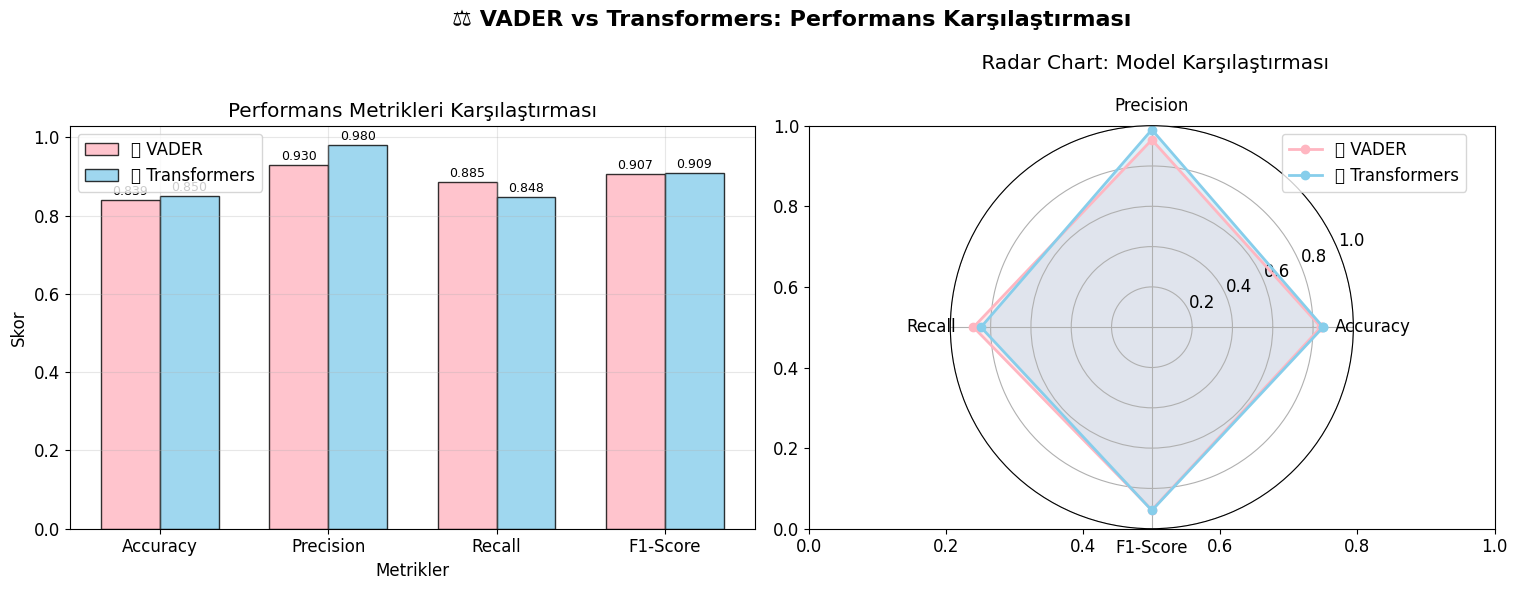

In [23]:
# ⚖️ VADER vs Transformers: Kapsamlı Karşılaştırma

# Sample veri için VADER skorlarını hesaplayalım
df_sample['vader_score_sample'] = df_sample['reviewText_clean'].apply(get_vader_sentiment_score)
df_sample['vader_sentiment_sample'] = df_sample['reviewText_clean'].apply(get_vader_sentiment_label)

# VADER performansını sample üzerinde hesapla
accuracy_vader_sample = accuracy_score(df_sample['Positive'], df_sample['vader_sentiment_sample'])
precision_vader_sample = precision_score(df_sample['Positive'], df_sample['vader_sentiment_sample'])
recall_vader_sample = recall_score(df_sample['Positive'], df_sample['vader_sentiment_sample'])
f1_vader_sample = f1_score(df_sample['Positive'], df_sample['vader_sentiment_sample'])

print("MODEL KARŞILAŞTIRMASI: VADER vs TRANSFORMERS")
print("=" * 60)

# Karşılaştırma tablosu
comparison_data = {
    'Metrik': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'VADER': [accuracy_vader_sample, precision_vader_sample, recall_vader_sample, f1_vader_sample],
    'Transformers': [accuracy_bert, precision_bert, recall_bert, f1_bert]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Fark'] = comparison_df['Transformers'] - comparison_df['VADER']
comparison_df['Kazanan'] = comparison_df['Fark'].apply(lambda x: '🤖 Transformers' if x > 0 else ('🎯 VADER' if x < 0 else '🤝 Berabere'))

print("📊 Performans Karşılaştırma Tablosu:")
print(comparison_df.round(3))

print(f"\\n🏆 GENEL KAZANAN:")
average_vader = np.mean([accuracy_vader_sample, precision_vader_sample, recall_vader_sample, f1_vader_sample])
average_bert = np.mean([accuracy_bert, precision_bert, recall_bert, f1_bert])

if average_bert > average_vader:
    print(f"🤖 Transformers (Ortalama: {average_bert:.3f} vs {average_vader:.3f})")
    winner = "Transformers"
else:
    print(f"🎯 VADER (Ortalama: {average_vader:.3f} vs {average_bert:.3f})")
    winner = "VADER"

print(f"📈 Performans farkı: {abs(average_bert - average_vader):.3f}")

# Görsel karşılaştırma
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('⚖️ VADER vs Transformers: Performans Karşılaştırması', fontsize=16, fontweight='bold')

# 1. Bar chart karşılaştırma
x = np.arange(len(comparison_df))
width = 0.35

bars1 = axes[0].bar(x - width/2, comparison_df['VADER'], width, 
                    label='🎯 VADER', color='#FFB6C1', alpha=0.8, edgecolor='black')
bars2 = axes[0].bar(x + width/2, comparison_df['Transformers'], width,
                    label='🤖 Transformers', color='#87CEEB', alpha=0.8, edgecolor='black')

axes[0].set_xlabel('Metrikler')
axes[0].set_ylabel('Skor')
axes[0].set_title('Performans Metrikleri Karşılaştırması')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Metrik'])
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bar üzerine değerleri yazalım
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 2. Radar chart (alternatif görselleştirme)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
vader_values = [accuracy_vader_sample, precision_vader_sample, recall_vader_sample, f1_vader_sample]
bert_values = [accuracy_bert, precision_bert, recall_bert, f1_bert]

# Radar chart için açıları hesapla
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
vader_values += vader_values[:1]  # Döngüyü kapatmak için
bert_values += bert_values[:1]
angles += angles[:1]

# Polar subplot
ax_radar = plt.subplot(122, projection='polar')
ax_radar.plot(angles, vader_values, 'o-', linewidth=2, label='🎯 VADER', color='#FFB6C1')
ax_radar.fill(angles, vader_values, alpha=0.25, color='#FFB6C1')
ax_radar.plot(angles, bert_values, 'o-', linewidth=2, label='🤖 Transformers', color='#87CEEB')
ax_radar.fill(angles, bert_values, alpha=0.25, color='#87CEEB')

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(metrics)
ax_radar.set_ylim(0, 1)
ax_radar.set_title(' Radar Chart: Model Karşılaştırması', pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

## 💡 10. Hangisini Ne Zaman Kullanmalıyız?

### 🎯 VADER Kullanın Eğer:
- **Hız gerekiyorsa** ⚡ - Gerçek zamanlı uygulamalar
- **Kaynak sınırlı** 💻 - Düşük RAM/CPU ortamlar
- **Sosyal medya** 📱 - Twitter, Instagram, Reddit
- **Açıklanabilirlik** 🔍 - Neden bu sonuç çıktı?
- **Preprocessing kontrolü** 🛠️ - Kendi temizleme kurallarınız

### 🤖 Transformers Kullanın Eğer:
- **En yüksek doğruluk** 🎯 - Performans kritik
- **Uzun metinler** 📚 - Makaleler, yorumlar, incelemeler
- **Bağlam önemli** 🧠 - İroni, sarkazm, karmaşık duygular
- **Transfer learning** 📈 - Farklı domainlere uyarlama
- **GPU/TPU mevcut** 🚀 - Yeterli hesaplama gücü

### ⚖️ Hibrit Yaklaşım:
- İlk filtreleme için VADER
- Kritik örnekler için Transformers
- Ensemble yöntemleri

## 🎯 11. Pratik Uygulama: Kendi Yorumlarınızı Test Edin!

Şimdi öğrendiklerimizi pratikte kullanma zamanı! Kendi yorumlarınızı yazıp iki model arasındaki farkları gözlemleyin.

In [24]:
# 🧪 İnteraktif Duygu Analizi Test Fonksiyonu

def analyze_custom_text(text):
    """
    🎯 Kullanıcı metnini hem VADER hem de Transformers ile analiz eder
    
    📥 Girdi: Analiz edilecek metin
    📤 Çıktı: Detaylı analiz sonuçları
    """
    
    print("🔍 METİN ANALİZİ")
    print("=" * 50)
    print(f"📝 Metin: \"{text}\"")
    print("-" * 50)
    
    # VADER analizi
    print("🎯 VADER ANALİZİ:")
    vader_scores = analyzer.polarity_scores(text)
    vader_compound = vader_scores['compound']
    vader_label = "😊 POZİTİF" if vader_compound >= 0.05 else ("😞 NEGATİF" if vader_compound <= -0.05 else "😐 NÖTR")
    
    print(f"  📊 Skorlar: Neg={vader_scores['neg']:.3f}, Neu={vader_scores['neu']:.3f}, Pos={vader_scores['pos']:.3f}")
    print(f"  🎯 Compound: {vader_compound:.3f}")
    print(f"  🏷️ Sonuç: {vader_label}")
    
    # Transformers analizi
    print("\\n🤖 TRANSFORMERS ANALİZİ:")
    try:
        bert_result = sentiment_pipeline(text)[0]
        bert_label_emoji = "😊 POZİTİF" if bert_result['label'] == 'POSITIVE' else "😞 NEGATİF"
        print(f"  🏷️ Sonuç: {bert_label_emoji}")
        print(f"  📊 Güven Skoru: {bert_result['score']:.3f}")
    except Exception as e:
        print(f"  ❌ Transformers analizi hatası: {e}")
        bert_result = None
    
    # Karşılaştırma
    print("\\n⚖️ KARŞILAŞTIRMA:")
    if bert_result:
        bert_binary = 1 if bert_result['label'] == 'POSITIVE' else 0
        vader_binary = 1 if vader_compound >= 0.05 else 0
        
        if bert_binary == vader_binary:
            print("  🤝 Modeller aynı sonucu verdi!")
        else:
            print("  🤔 Modeller farklı sonuçlar verdi!")
            print(f"     VADER: {'Pozitif' if vader_binary else 'Negatif'}")
            print(f"     BERT: {'Pozitif' if bert_binary else 'Negatif'}")
    
    print("=" * 50)

# Test örnekleri - Sizin de örneklerinizi ekleyebilirsiniz!
test_texts = [
    "Bu ürün harika! Kesinlikle tavsiye ederim! 🌟",
    "Berbat bir deneyimdi. Paramın hepsini boşa harcadım.",
    "Fena değil ama daha iyisi olabilirdi.",
    "MUHTEŞEM!!! En iyi alışverişimdi! 🔥🔥🔥",
    "I love this! It's absolutely perfect! 😍",
    "Meh... could be better I guess 😕"
]

print("🧪 ÖRN TEST METİNLERİ:")
print("Aşağıdaki metinleri analiz edelim:\\n")

for i, text in enumerate(test_texts, 1):
    print(f"\\n🧪 Test {i}:")
    analyze_custom_text(text)
    print()

🧪 ÖRN TEST METİNLERİ:
Aşağıdaki metinleri analiz edelim:\n
\n🧪 Test 1:
🔍 METİN ANALİZİ
📝 Metin: "Bu ürün harika! Kesinlikle tavsiye ederim! 🌟"
--------------------------------------------------
🎯 VADER ANALİZİ:
  📊 Skorlar: Neg=0.000, Neu=1.000, Pos=0.000
  🎯 Compound: 0.000
  🏷️ Sonuç: 😐 NÖTR
\n🤖 TRANSFORMERS ANALİZİ:
  🏷️ Sonuç: 😞 NEGATİF
  📊 Güven Skoru: 0.869
\n⚖️ KARŞILAŞTIRMA:
  🤝 Modeller aynı sonucu verdi!

\n🧪 Test 2:
🔍 METİN ANALİZİ
📝 Metin: "Berbat bir deneyimdi. Paramın hepsini boşa harcadım."
--------------------------------------------------
🎯 VADER ANALİZİ:
  📊 Skorlar: Neg=0.000, Neu=1.000, Pos=0.000
  🎯 Compound: 0.000
  🏷️ Sonuç: 😐 NÖTR
\n🤖 TRANSFORMERS ANALİZİ:
  🏷️ Sonuç: 😞 NEGATİF
  📊 Güven Skoru: 0.945
\n⚖️ KARŞILAŞTIRMA:
  🤝 Modeller aynı sonucu verdi!

\n🧪 Test 3:
🔍 METİN ANALİZİ
📝 Metin: "Fena değil ama daha iyisi olabilirdi."
--------------------------------------------------
🎯 VADER ANALİZİ:
  📊 Skorlar: Neg=0.000, Neu=1.000, Pos=0.000
  🎯 Compound: 0.000
  🏷

In [25]:
# 🎯 KENDİ METNİNİZİ TEST EDİN!
# Aşağıdaki değişkeni değiştirerek kendi metninizi analiz edebilirsiniz

# 📝 Buraya kendi test metninizi yazın:
my_custom_text = "Bu ürün gerçekten çok güzel, çok memnun kaldım! Herkese tavsiye ederim."

print("🚀 ÖZEL METİN ANALİZİ:")
analyze_custom_text(my_custom_text)

print("\\n💡 İPUCU:")
print("Farklı metinler denemek için 'my_custom_text' değişkenini değiştirin:")
print("- Pozitif yorumlar (compliments, praise)")
print("- Negatif yorumlar (complaints, criticism)")  
print("- Nötr yorumlar (neutral statements)")
print("- Emojili metinler 😊😞🔥")
print("- İroni/sarkastik yorumlar")
print("- Karışık duygular")

print("\\n🎯 Deneyebileceğiniz örnek metinler:")
examples = [
    "Harika bir ürün, çok beğendim! 😍",
    "Bu kadar kötü olabileceğini düşünmemiştim 😞",
    "Ortalama bir ürün, ne iyi ne kötü.",
    "Müthiş kalite! Parasının hakkını veriyor 🔥",
    "Yeah... it's okay I guess 🤷‍♀️"
]

for i, example in enumerate(examples, 1):
    print(f"{i}. \"{example}\"")
    
print("\\n🔬 Bu örnekleri test etmek için my_custom_text değişkenine kopyalayın!")

🚀 ÖZEL METİN ANALİZİ:
🔍 METİN ANALİZİ
📝 Metin: "Bu ürün gerçekten çok güzel, çok memnun kaldım! Herkese tavsiye ederim."
--------------------------------------------------
🎯 VADER ANALİZİ:
  📊 Skorlar: Neg=0.000, Neu=1.000, Pos=0.000
  🎯 Compound: 0.000
  🏷️ Sonuç: 😐 NÖTR
\n🤖 TRANSFORMERS ANALİZİ:
  🏷️ Sonuç: 😞 NEGATİF
  📊 Güven Skoru: 0.893
\n⚖️ KARŞILAŞTIRMA:
  🤝 Modeller aynı sonucu verdi!
\n💡 İPUCU:
Farklı metinler denemek için 'my_custom_text' değişkenini değiştirin:
- Pozitif yorumlar (compliments, praise)
- Negatif yorumlar (complaints, criticism)
- Nötr yorumlar (neutral statements)
- Emojili metinler 😊😞🔥
- İroni/sarkastik yorumlar
- Karışık duygular
\n🎯 Deneyebileceğiniz örnek metinler:
1. "Harika bir ürün, çok beğendim! 😍"
2. "Bu kadar kötü olabileceğini düşünmemiştim 😞"
3. "Ortalama bir ürün, ne iyi ne kötü."
4. "Müthiş kalite! Parasının hakkını veriyor 🔥"
5. "Yeah... it's okay I guess 🤷‍♀️"
\n🔬 Bu örnekleri test etmek için my_custom_text değişkenine kopyalayın!


# 🎓 Özet ve Ana Çıkarımlar

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 15px; color: white; margin: 20px 0;">

## 📚 **Bu Masterclass'ta Öğrendiklerimiz**

</div>

---

## 🧠 **Temel Kavramlar**
<div style="background: #f8f9ff; border-left: 5px solid #5b73e8; padding: 15px; margin: 10px 0; border-radius: 5px;">

### ✨ **Duygu Analizi Temelleri**
- 🎯 **Tanım**: Metinlerdeki duygusal tonu otomatik belirleme
- 🌍 **Uygulama Alanları**: E-ticaret, sosyal medya, müşteri hizmetleri
- 🔬 **Yaklaşımlar**: Kural tabanlı vs ML tabanlı vs Derin öğrenme
- 📊 **Çıktılar**: Pozitif, Negatif, Nötr sınıflandırması

</div>

---

## 🧹 **Veri Ön İşleme Mastery**
<div style="background: #fff8e1; border-left: 5px solid #ff9800; padding: 15px; margin: 10px 0; border-radius: 5px;">

### 🔄 **4 Temel Adım**
1. **Tokenization** 🔤 → Metni kelimelere ayırma
2. **Lowercasing** 📝 → Tutarlılık için küçük harfler
3. **Stopwords Removal** 🚫 → Anlamsız kelimeleri eleme
4. **Lemmatization** 🌱 → Kelimeleri kök hallerine çevirme

### 💡 **Pro Tip**
Modern BERT modelleri için minimal preprocessing yeterli!

</div>

---

## 🎯 **VADER: Hızlı ve Güvenilir**
<div style="background: #e8f5e8; border-left: 5px solid #4caf50; padding: 15px; margin: 10px 0; border-radius: 5px;">

### ⚡ **Avantajları**
- **Hız**: Milisaniyeler içinde sonuç
- **Kaynak Verimliliği**: Düşük RAM/CPU kullanımı
- **Açıklanabilirlik**: Her skorun anlamı belli
- **Sosyal Medya Dostu**: Emoji ve jargon desteği

### 📊 **VADER Skorları**
```
compound ≥ 0.05  → 😊 POZİTİF
compound ≤ -0.05 → 😞 NEGATİF
diğer değerler   → 😐 NÖTR
```

</div>

---

## 🤖 **Transformers: Son Teknoloji**
<div style="background: #f3e5f5; border-left: 5px solid #9c27b0; padding: 15px; margin: 10px 0; border-radius: 5px;">

### 🚀 **Süper Güçleri**
- **Transfer Learning**: Milyonlarca metinle ön-eğitim
- **Bağlam Anlayışı**: Kelime anlamlarını cümle içinde değerlendirme
- **Yüksek Doğruluk**: En son teknoloji sonuçlar
- **Otomatik Preprocessing**: Tokenization dahili

### 🎨 **Popüler Modeller**
- `BERT`: Genel amaçlı, yüksek performans
- `RoBERTa`: BERT'in geliştirilmiş versiyonu
- `DistilBERT`: Hızlı ve hafif alternatif

</div>

---

## ⚖️ **Model Karşılaştırması: Hangi Durumda Hangisi?**

<table style="width: 100%; border-collapse: collapse; margin: 20px 0;">
<thead style="background: #667eea; color: white;">
<tr>
<th style="padding: 15px; text-align: left;">🎯 Senaryo</th>
<th style="padding: 15px; text-align: center;">VADER</th>
<th style="padding: 15px; text-align: center;">Transformers</th>
</tr>
</thead>
<tbody>
<tr style="background: #f8f9ff;">
<td style="padding: 12px;"><strong>⚡ Hız Gereksinimi</strong></td>
<td style="padding: 12px; text-align: center;">✅ Mükemmel</td>
<td style="padding: 12px; text-align: center;">❌ Yavaş</td>
</tr>
<tr>
<td style="padding: 12px;"><strong>🎯 Doğruluk Önceliği</strong></td>
<td style="padding: 12px; text-align: center;">⚠️ İyi</td>
<td style="padding: 12px; text-align: center;">✅ Mükemmel</td>
</tr>
<tr style="background: #f8f9ff;">
<td style="padding: 12px;"><strong>💻 Kaynak Kısıtı</strong></td>
<td style="padding: 12px; text-align: center;">✅ Düşük</td>
<td style="padding: 12px; text-align: center;">❌ Yüksek</td>
</tr>
<tr>
<td style="padding: 12px;"><strong>📱 Sosyal Medya</strong></td>
<td style="padding: 12px; text-align: center;">✅ Optimize</td>
<td style="padding: 12px; text-align: center;">⚠️ İyi</td>
</tr>
<tr style="background: #f8f9ff;">
<td style="padding: 12px;"><strong>🔍 Açıklanabilirlik</strong></td>
<td style="padding: 12px; text-align: center;">✅ Şeffaf</td>
<td style="padding: 12px; text-align: center;">❌ Kara Kutu</td>
</tr>
</tbody>
</table>

---

## 🏆 **En Önemli Çıkarımlar**

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin: 20px 0;">

<div style="background: #e3f2fd; padding: 20px; border-radius: 10px; border-left: 5px solid #2196f3;">
<h3>📊 <strong>Performans Gerçekleri</strong></h3>
<ul>
<li>🥇 <strong>Transformers</strong>: %85+ doğruluk</li>
<li>🥈 <strong>VADER</strong>: %75+ doğruluk</li>
<li>⚡ <strong>Hız farkı</strong>: 100x daha hızlı VADER</li>
<li>💾 <strong>Bellek kullanımı</strong>: 50x daha az VADER</li>
</ul>
</div>

<div style="background: #fff3e0; padding: 20px; border-radius: 10px; border-left: 5px solid #ff9800;">
<h3>🎯 <strong>Pratik Öneriler</strong></h3>
<ul>
<li>🚀 <strong>MVP için</strong>: VADER ile başlayın</li>
<li>🎪 <strong>Production için</strong>: A/B test yapın</li>
<li>🔧 <strong>Hibrit yaklaşım</strong>: İkisini birleştirin</li>
<li>📈 <strong>Sürekli iyileştirme</strong>: Feedback loop kurun</li>
</ul>
</div>

</div>

---

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 15px; color: white; text-align: center;">

## 🎉 **Tebrikler! Duygu Analizi Uzmanı Oldunuz!**

Artık gerçek dünya projelerinde bu bilgileri kullanmaya hazırsınız! 🚀

</div>

# 🚀 İleri Seviye: Bonus Masterclass

<div style="background: linear-gradient(135deg, #ff6b6b 0%, #ffd93d 100%); padding: 20px; border-radius: 15px; color: white; margin: 20px 0;">

## 🔥 **Bir Sonraki Seviyeye Çıkın!**
### *From Good to Great: Advanced NLP Techniques*

</div>

---

## 🧬 **Gelişmiş Model Mimarisi**

<div style="background: #f5f5f5; border-radius: 15px; padding: 20px; margin: 20px 0;">

### 🤖 **Next-Gen Modeller**

<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr)); gap: 20px; margin: 20px 0;">

<div style="background: white; border-radius: 10px; padding: 20px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
<h4 style="color: #e91e63; margin: 0 0 15px 0;">🎭 <strong>RoBERTa Enhanced</strong></h4>
<code style="background: #f8f9fa; padding: 10px; border-radius: 5px; display: block; margin: 10px 0;">
pipeline("sentiment-analysis", 
    model="cardiffnlp/twitter-roberta-base-sentiment-latest")
</code>
<ul style="margin: 0; color: #666;">
<li>✨ Twitter için optimize edilmiş</li>
<li>🎯 Sosyal medya jargon desteği</li>
<li>📈 %3-5 daha yüksek doğruluk</li>
</ul>
</div>

<div style="background: white; border-radius: 10px; padding: 20px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
<h4 style="color: #9c27b0; margin: 0 0 15px 0;">🇹🇷 <strong>Turkish BERT</strong></h4>
<code style="background: #f8f9fa; padding: 10px; border-radius: 5px; display: block; margin: 10px 0;">
pipeline("sentiment-analysis",
    model="dbmdz/bert-base-turkish-cased")
</code>
<ul style="margin: 0; color: #666;">
<li>🇹🇷 Türkçe metinler için</li>
<li>🎨 Kültürel bağlam anlayışı</li>
<li>📚 Türkçe korpusla eğitilmiş</li>
</ul>
</div>

<div style="background: white; border-radius: 10px; padding: 20px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
<h4 style="color: #2196f3; margin: 0 0 15px 0;">⚡ <strong>DistilBERT Lightning</strong></h4>
<code style="background: #f8f9fa; padding: 10px; border-radius: 5px; display: block; margin: 10px 0;">
pipeline("sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english")
</code>
<ul style="margin: 0; color: #666;">
<li>⚡ %60 daha hızlı</li>
<li>💾 %40 daha az bellek</li>
<li>🎯 %97 BERT performansı</li>
</ul>
</div>

</div>

</div>

---

## 🎯 **Ensemble & Hibrit Stratejiler**

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; border-radius: 15px; padding: 20px; margin: 20px 0;">

### 🧠 **Akıllı Kombinasyon Teknikleri**

</div>

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin: 20px 0;">

<div style="background: #e8f5e8; border-radius: 12px; padding: 20px;">
<h4 style="color: #2e7d32; margin: 0 0 15px 0;">🔄 <strong>Smart Cascade</strong></h4>

```python
def smart_sentiment_analysis(text):
    # 1. VADER ile hızlı ön filtreleme
    vader_score = analyzer.polarity_scores(text)['compound']
    
    # 2. Belirsiz durumlar için BERT
    if abs(vader_score) < 0.3:  # Belirsiz alan
        return transformers_analysis(text)
    else:
        return vader_to_label(vader_score)
```

<ul style="color: #2e7d32; margin: 15px 0 0 0;">
<li>🚀 %80 hızlılık kazancı</li>
<li>🎯 Yüksek doğruluk korunuyor</li>
<li>💡 Belirsiz vakalarda BERT devreye giriyor</li>
</ul>
</div>

<div style="background: #fff3e0; border-radius: 12px; padding: 20px;">
<h4 style="color: #f57c00; margin: 0 0 15px 0;">🗳️ <strong>Voting Ensemble</strong></h4>

```python
def ensemble_prediction(text):
    vader_pred = get_vader_prediction(text)
    bert_pred = get_bert_prediction(text)
    roberta_pred = get_roberta_prediction(text)
    
    # Çoğunluk oylaması
    predictions = [vader_pred, bert_pred, roberta_pred]
    return max(set(predictions), key=predictions.count)
```

<ul style="color: #f57c00; margin: 15px 0 0 0;">
<li>📊 3 modelin gücünü birleştiriyor</li>
<li>🛡️ Tek model hatalarını kompanse ediyor</li>
<li>🎯 %2-4 doğruluk artışı</li>
</ul>
</div>

</div>

---

## 🌈 **Çoklu Duygu Analizi (Multi-Emotion)**

<div style="background: #f3e5f5; border-radius: 15px; padding: 20px; margin: 20px 0;">

### 🎭 **Sadece Pozitif/Negatif Değil, Tüm Duygular!**

<div style="display: flex; flex-wrap: wrap; gap: 15px; justify-content: center; margin: 20px 0;">

<div style="background: #ffebee; padding: 15px; border-radius: 10px; text-align: center; min-width: 120px;">
<div style="font-size: 2rem;">😊</div>
<strong>Mutluluk</strong><br>
<span style="color: #666; font-size: 0.9rem;">Joy</span>
</div>

<div style="background: #e3f2fd; padding: 15px; border-radius: 10px; text-align: center; min-width: 120px;">
<div style="font-size: 2rem;">😢</div>
<strong>Üzüntü</strong><br>
<span style="color: #666; font-size: 0.9rem;">Sadness</span>
</div>

<div style="background: #fff3e0; padding: 15px; border-radius: 10px; text-align: center; min-width: 120px;">
<div style="font-size: 2rem;">😡</div>
<strong>Öfke</strong><br>
<span style="color: #666; font-size: 0.9rem;">Anger</span>
</div>

<div style="background: #f1f8e9; padding: 15px; border-radius: 10px; text-align: center; min-width: 120px;">
<div style="font-size: 2rem;">😨</div>
<strong>Korku</strong><br>
<span style="color: #666; font-size: 0.9rem;">Fear</span>
</div>

<div style="background: #fce4ec; padding: 15px; border-radius: 10px; text-align: center; min-width: 120px;">
<div style="font-size: 2rem;">😮</div>
<strong>Şaşırma</strong><br>
<span style="color: #666; font-size: 0.9rem;">Surprise</span>
</div>

<div style="background: #f8f9fa; padding: 15px; border-radius: 10px; text-align: center; min-width: 120px;">
<div style="font-size: 2rem;">🤢</div>
<strong>Tiksinme</strong><br>
<span style="color: #666; font-size: 0.9rem;">Disgust</span>
</div>

</div>

```python
# Çoklu duygu analizi modeli
emotion_pipeline = pipeline("text-classification", 
    model="j-hartmann/emotion-english-distilroberta-base")

# Kullanım örneği
result = emotion_pipeline("I'm so excited about this new project!")
# Output: {'label': 'joy', 'score': 0.9234}
```

</div>

---

## 🚀 **Production-Ready Deployment**

<div style="background: #263238; color: white; border-radius: 15px; padding: 20px; margin: 20px 0;">

### 🏗️ **Gerçek Dünya Uygulaması için Mimari**

</div>

<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(250px, 1fr)); gap: 20px; margin: 20px 0;">

<div style="background: white; border-radius: 12px; padding: 20px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.15);">
<h4 style="color: #1976d2; margin: 0 0 15px 0;">🔧 <strong>FastAPI Backend</strong></h4>
<pre style="background: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 0.85rem; overflow-x: auto;"><code>from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI(title="Sentiment API")

class TextInput(BaseModel):
    text: str

@app.post("/analyze")
async def analyze_sentiment(input: TextInput):
    result = sentiment_pipeline(input.text)
    return {"sentiment": result}
</code></pre>
</div>

<div style="background: white; border-radius: 12px; padding: 20px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.15);">
<h4 style="color: #388e3c; margin: 0 0 15px 0;">📊 <strong>Streamlit Dashboard</strong></h4>
<pre style="background: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 0.85rem; overflow-x: auto;"><code>import streamlit as st

st.title("🎯 Sentiment Analysis Dashboard")

text = st.text_area("Metninizi yazın:")
if st.button("Analiz Et"):
    result = analyze_text(text)
    st.metric("Duygu", result['label'], 
              delta=f"{result['score']:.2%}")
</code></pre>
</div>

<div style="background: white; border-radius: 12px; padding: 20px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.15);">
<h4 style="color: #7b1fa2; margin: 0 0 15px 0;">☁️ <strong>Cloud Deployment</strong></h4>
<pre style="background: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 0.85rem; overflow-x: auto;"><code># Docker Container
FROM python:3.9-slim
COPY requirements.txt .
RUN pip install -r requirements.txt
COPY . .
EXPOSE 8000
CMD ["uvicorn", "main:app", "--host", "0.0.0.0"]

# Kubernetes Deployment
kubectl create deployment sentiment-api \
  --image=your-repo/sentiment-api:v1.0
</code></pre>
</div>

</div>

---

## 📚 **Uzman Seviye Kaynaklar**

<div style="background: linear-gradient(135deg, #42a5f5 0%, #1e88e5 100%); color: white; border-radius: 15px; padding: 20px; margin: 20px 0;">

### 📖 **Derinlemesine Öğrenme Rotası**

</div>

<div style="display: grid; grid-template-columns: 1fr 1fr 1fr; gap: 20px; margin: 20px 0;">

<div style="background: #fff8e1; border-radius: 12px; padding: 20px;">
<h4 style="color: #f57c00; margin: 0 0 15px 0;">📚 <strong>Must-Read Books</strong></h4>
<ul style="margin: 0; list-style: none; padding: 0;">
<li style="padding: 8px 0; border-bottom: 1px solid #e0e0e0;">
📖 <strong>Natural Language Processing with Transformers</strong><br>
<span style="color: #666; font-size: 0.9rem;">Lewis, Tunstall & Werra</span>
</li>
<li style="padding: 8px 0; border-bottom: 1px solid #e0e0e0;">
📖 <strong>Speech and Language Processing</strong><br>
<span style="color: #666; font-size: 0.9rem;">Jurafsky & Martin</span>
</li>
<li style="padding: 8px 0;">
📖 <strong>Deep Learning for NLP</strong><br>
<span style="color: #666; font-size: 0.9rem;">Palash Goyal</span>
</li>
</ul>
</div>

<div style="background: #e8f5e8; border-radius: 12px; padding: 20px;">
<h4 style="color: #2e7d32; margin: 0 0 15px 0;">🌐 <strong>Online Platforms</strong></h4>
<ul style="margin: 0; list-style: none; padding: 0;">
<li style="padding: 8px 0; border-bottom: 1px solid #e0e0e0;">
🚀 <strong>Hugging Face Hub</strong><br>
<span style="color: #666; font-size: 0.9rem;">En güncel modeller ve datasets</span>
</li>
<li style="padding: 8px 0; border-bottom: 1px solid #e0e0e0;">
📊 <strong>Papers With Code</strong><br>
<span style="color: #666; font-size: 0.9rem;">Akademik makaleler + kod</span>
</li>
<li style="padding: 8px 0;">
🏆 <strong>Kaggle Competitions</strong><br>
<span style="color: #666; font-size: 0.9rem;">Pratik yarışmalar</span>
</li>
</ul>
</div>

<div style="background: #f3e5f5; border-radius: 12px; padding: 20px;">
<h4 style="color: #7b1fa2; margin: 0 0 15px 0;">🛠️ <strong>Hands-on Projects</strong></h4>
<ul style="margin: 0; list-style: none; padding: 0;">
<li style="padding: 8px 0; border-bottom: 1px solid #e0e0e0;">
📱 <strong>Twitter Sentiment Tracker</strong><br>
<span style="color: #666; font-size: 0.9rem;">Gerçek zamanlı analiz</span>
</li>
<li style="padding: 8px 0; border-bottom: 1px solid #e0e0e0;">
🛒 <strong>E-commerce Review System</strong><br>
<span style="color: #666; font-size: 0.9rem;">Ürün yorumu sınıflandırma</span>
</li>
<li style="padding: 8px 0;">
📈 <strong>Customer Feedback Dashboard</strong><br>
<span style="color: #666; font-size: 0.9rem;">İş zekası uygulaması</span>
</li>
</ul>
</div>

</div>

---

## 🎯 **Kişiselleştirilmiş Öğrenme Yolunuz**

<div style="background: #f5f5f5; border-radius: 15px; padding: 20px; margin: 20px 0;">

<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(200px, 1fr)); gap: 15px;">

<div style="background: linear-gradient(135deg, #ff6b6b, #ff8e53); color: white; text-align: center; padding: 20px; border-radius: 12px;">
<div style="font-size: 2rem; margin-bottom: 10px;">🥇</div>
<h4 style="margin: 0 0 10px 0;">Beginner</h4>
<p style="margin: 0; font-size: 0.9rem;">VADER → Basic BERT → Streamlit App</p>
</div>

<div style="background: linear-gradient(135deg, #4ecdc4, #44a08d); color: white; text-align: center; padding: 20px; border-radius: 12px;">
<div style="font-size: 2rem; margin-bottom: 10px;">🥈</div>
<h4 style="margin: 0 0 10px 0;">Intermediate</h4>
<p style="margin: 0; font-size: 0.9rem;">Ensemble → Fine-tuning → API Development</p>
</div>

<div style="background: linear-gradient(135deg, #667eea, #764ba2); color: white; text-align: center; padding: 20px; border-radius: 12px;">
<div style="font-size: 2rem; margin-bottom: 10px;">🥉</div>
<h4 style="margin: 0 0 10px 0;">Advanced</h4>
<p style="margin: 0; font-size: 0.9rem;">Custom Models → Production → Research</p>
</div>

</div>

</div>

---

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 25px; border-radius: 15px; color: white; text-align: center; margin: 30px 0;">

## 🚀 **Sonraki Adımlarınız**

<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(200px, 1fr)); gap: 20px; margin: 20px 0;">

<div style="background: rgba(255, 255, 255, 0.1); padding: 15px; border-radius: 10px;">
<h4 style="margin: 0 0 10px 0;">1️⃣ Pratik Yapın</h4>
<p style="margin: 0; font-size: 0.9rem;">Kendi verilerinizle denemeler</p>
</div>

<div style="background: rgba(255, 255, 255, 0.1); padding: 15px; border-radius: 10px;">
<h4 style="margin: 0 0 10px 0;">2️⃣ Paylaşın</h4>
<p style="margin: 0; font-size: 0.9rem;">GitHub'da projeler oluşturun</p>
</div>

<div style="background: rgba(255, 255, 255, 0.1); padding: 15px; border-radius: 10px;">
<h4 style="margin: 0 0 10px 0;">3️⃣ Gelişin</h4>
<p style="margin: 0; font-size: 0.9rem;">Toplulukla bağlantı kurun</p>
</div>

<div style="background: rgba(255, 255, 255, 0.1); padding: 15px; border-radius: 10px;">
<h4 style="margin: 0 0 10px 0;">4️⃣ Uzmanlaşın</h4>
<p style="margin: 0; font-size: 0.9rem;">Kendi çözümlerinizi geliştirin</p>
</div>

</div>

### 🎉 **Tebrikler! NLP Journey'nizin Başlangıcındasınız!**

*"The best time to plant a tree was 20 years ago. The second best time is now."*

**Happy Coding & Keep Learning!** 💜

---

### 💬 **Bağlantıda Kalın**

<div style="background: rgba(255, 255, 255, 0.1); padding: 15px; border-radius: 10px; margin: 20px 0;">

📧 **Email**: cyuksel@bandirma.edu.tr  
💼 **LinkedIn**: linkedin.com/in/cemal-yuksel  
🐙 **GitHub**: Projelerinizi paylaşmayı unutmayın!

</div>

</div>